In [40]:
%matplotlib notebook

In [41]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame
import json
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick
from datetime import datetime

In [42]:
# load covid variants dataset
us_state_mask_mandtes_df = pd.read_csv('US_State_Mask_Mandates.csv')



# This data set has location as filed name so renamed the location field name to country
us_state_mask_mandtes_df.rename(columns={'State_Tribe_Territory':'state'},inplace=True)

us_state_mask_mandtes_df['date'] = us_state_mask_mandtes_df['date'].astype('datetime64[ns]')

us_state_mask_mandtes_df.head()


# Filtering the records belongs to 6 countries
#countries_6_variants_df = variants_df.loc[variants_df['country'].isin(['United States','Canada','Germany','India','Japan','Sweden'])]

# In the df date is defined as on object so converting into datetime64 
# Because datasets will be joined by country and date fields
#countries_6_variants_df['date'] = countries_6_variants_df['date'].astype('datetime64[ns]')

# Displaying the first five records
#countries_6_variants_df.head()


,state,date,order_code,Face_Masks_Required_in_Public,Specific_counties,Source_of_Action,URL,Citation
0,AK,2020-04-08,1,NaN,NaN,NaN,NaN,NaN
1,AK,2020-04-09,1,NaN,NaN,NaN,NaN,NaN
2,AK,2020-04-10,1,NaN,NaN,NaN,NaN,NaN
3,AK,2020-04-11,1,NaN,NaN,NaN,NaN,NaN
4,AK,2020-04-12,1,NaN,NaN,NaN,NaN,NaN


In [43]:
# Load face covering policies dataset
usa_confimed_cases_df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')


# Rename entity field as country and day as date
usa_confimed_cases_df.rename(columns={'submission_date':'date'},inplace=True)

usa_confimed_cases_df['date'] = usa_confimed_cases_df['date'].astype('datetime64[ns]')

usa_confimed_cases_df.head()

# Filter only six countries
#countries_6_face_covering_df = face_covering_df.loc[face_covering_df['country'].isin(['United States','Canada','Germany','India','Japan','Sweden'])]

# In the df date is defined as on object so converting into datetime64 
# Because datasets will be joined by country and date fields
#countries_6_face_covering_df['date'] = countries_6_face_covering_df['date'].astype('datetime64[ns]')





,date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
1,2021-09-01,ND,118491,107475.0,11016.0,536,66.0,1562,NaN,NaN,1,0.0,09/02/2021 01:49:05 PM,Agree,Not agree
2,2021-08-08,MD,473969,NaN,NaN,853,0.0,9881,9660.0,221.0,6,1.0,08/10/2021 12:00:00 AM,NaN,Agree
3,2020-05-13,VT,855,NaN,NaN,2,0.0,52,NaN,NaN,0,0.0,05/15/2020 12:00:00 AM,Not agree,Not agree
4,2021-02-02,IL,1130917,1130917.0,0.0,2304,0.0,21336,19306.0,2030.0,63,16.0,02/03/2021 02:55:58 PM,Agree,Agree


In [79]:
#Combine covid variant data with facecovering data set into a single dataset using country and date fields
combined_dataset = pd.merge(us_state_mask_mandtes_df,usa_confimed_cases_df,how='left',on=['state','date'])

small_dataset = combined_dataset[{'state','tot_cases','order_code'}]

#total_cases_count = combined_dataset['tot_cases'].value_counts()

# Display the info
#combined_dataset.info()

# Display the data table for preview
small_dataset.count()

small_dataset.head()

group_total_cases_df = small_dataset.groupby('state').sum().reset_index()
group_total_cases_df.head(100)

,state,tot_cases,order_code
0,AK,16890163,495
1,AL,149424837,1029
2,AR,93691285,1003
3,AS,452,531
4,AZ,237149485,495
5,CA,978490679,1343
6,CO,136452709,1017
7,CT,87939079,1461
8,DC,13757346,1267
9,DE,27439137,1317


<AxesSubplot:>

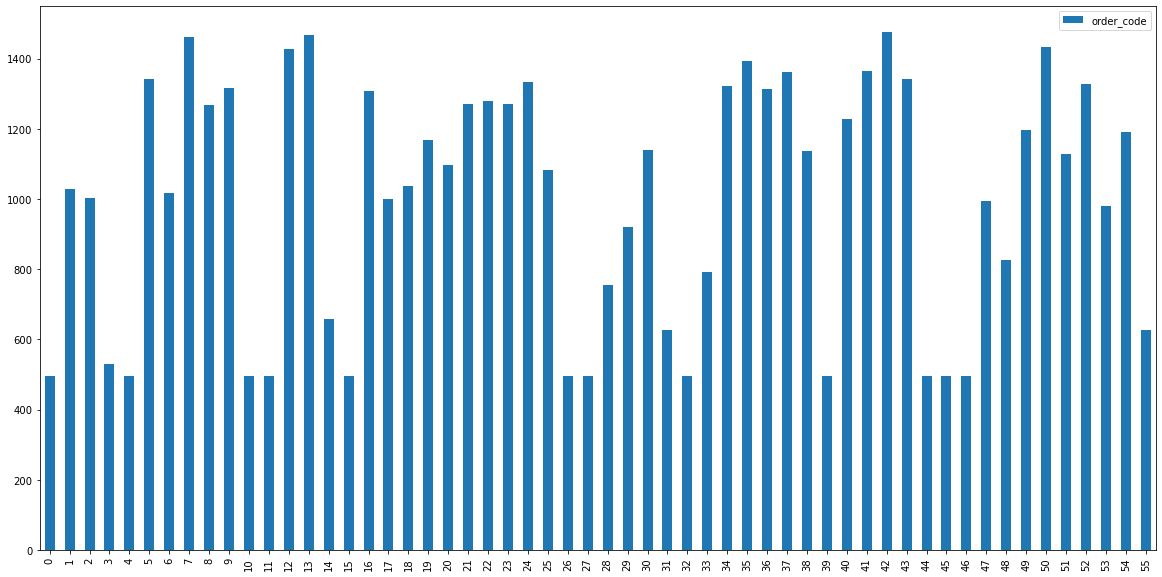

In [94]:

df2 = pd.DataFrame(group_total_cases_df, columns=["state","order_code"])


df2.plot.bar(figsize=(20,10), stacked=True)

Text(0, 0.5, 'Total Cases in each state')

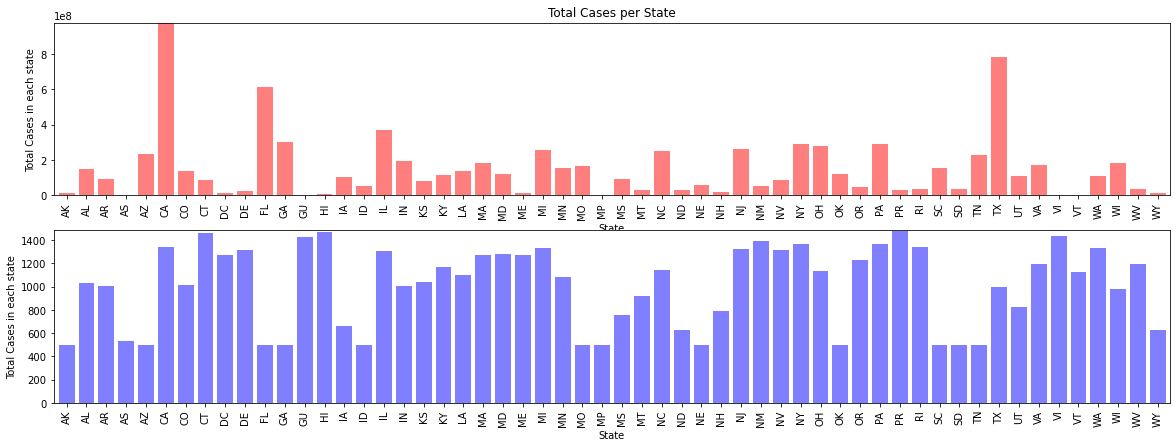

In [103]:
x_axis = np.arange(len(group_total_cases_df ))

tick_locations = [value+0.4 for value in x_axis]

fig, (ax1,ax2) = plt.subplots(2,figsize=(20,7))


ax1.bar(x_axis, group_total_cases_df["tot_cases"], color='r', alpha=0.5, align="edge")

ax1.set_xticks(tick_locations, group_total_cases_df["state"], rotation="vertical")

# Set x and y limits
ax1.set_xlim(-0.25, len(x_axis))
ax1.set_ylim(0, max(group_df["tot_cases"])+10)

# Set a Title and labels
ax1.set_title("Total Cases per State")
ax1.set_xlabel("State")
ax1.set_ylabel("Total Cases in each state")

# Save our graph and show the grap
#ax.set_tight_layout()
#ax.savefig("../total_cases_by_state.png")

#ax1.show()

#x_axis_order_code = np.arange(len(group_total_cases_df ))

ax2.bar(x_axis, group_total_cases_df["order_code"], color='b', alpha=0.5, align="edge")

ax2.set_xticks(tick_locations, group_total_cases_df["state"], rotation="vertical")

# Set x and y limits
ax2.set_xlim(-0.25, len(x_axis))
ax2.set_ylim(0, max(group_total_cases_df["order_code"])+10)

# Set a Title and labels

ax2.set_xlabel("State")
ax2.set_ylabel("Total Cases in each state")

In [35]:
small_dataset = combined_dataset[{'state','order_code'}]

total_cases_count = combined_dataset['order_code'].value_counts()

# Display the info
#combined_dataset.info()

# Display the data table for preview
small_dataset.count()

small_dataset.head()

group_order_df = small_dataset.groupby('state').sum().reset_index()
group_order_df.head(100)

,state,order_code
0,AK,495
1,AL,1029
2,AR,1003
3,AS,531
4,AZ,495
5,CA,1343
6,CO,1017
7,CT,1461
8,DC,1267
9,DE,1317


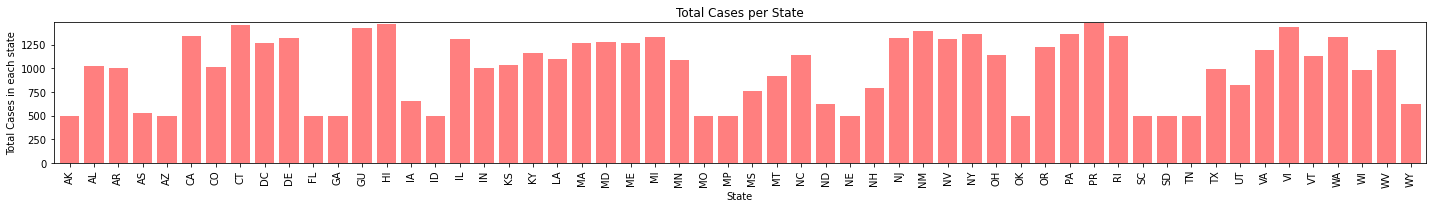

In [36]:
x_axis = np.arange(len(group_order_df ))

tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))

plt.bar(x_axis, group_order_df["order_code"], color='r', alpha=0.5, align="edge")

plt.xticks(tick_locations, group_df["state"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(group_df["order_code"])+10)

# Set a Title and labels
plt.title("Total Cases per State")
plt.xlabel("State")
plt.ylabel("Total Cases in each state")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../orders_by_state.png")

plt.show()



ax = df1.plot()

df2.plot(ax=ax)


In [ ]:
# This is my final dataset after dropping bad records with NaN values
combined_df_final = combined_dataset.dropna()
combined_df_final.head(20)

In [ ]:
combined_df_final.count()

In [ ]:
# Framinf the date range
A = '2020-01-01'
B = '2021-12-31'
#data_truncated = combined_df_final.loc[(combined_df_final['date'] >= A) & (combined_df_final['date'] <= B)]
#data_truncated.head(20)
#data_truncated.count()



In [ ]:
#What is the count of variants in different locations ?
#group_data = data_truncated.groupby('facial_coverings')
#group_data.head()
#group_data.count()

In [ ]:
canada_df = data_truncated.loc[data_truncated['country'].isin(['Canada'])]
canada_df_grouped = canada_df.groupby(['date','facial_coverings'])
x_axis = canada_df[['facial_coverings']]
dates = canada_df[['date']]
plt.xticks(rotation=90)
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

#US data plot
us_df = data_truncated.loc[data_truncated['country'].isin(['United States'])]
us_df_grouped = us_df.groupby(['date','facial_coverings'])
x_axis = us_df['facial_coverings']
dates = us_df['date']

plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="blue")

#Germany data plot
germany_df = data_truncated.loc[data_truncated['country'].isin(['Germany'])]
germany_df_grouped = germany_df.groupby(['date','facial_coverings'])
x_axis = germany_df['facial_coverings']
dates = germany_df['date']

plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="green")

plt.tight_layout()
plt.show()

In [ ]:

usa_df = data_truncated.loc[data_truncated['country'].isin(['United States'])]
#usa_df['daily_cases'] =usa_df['ConfirmedCases'].diff()
#usa_df['daily_cases'] =usa_df['daily_cases'].fillna(0)

x1_usa = usa_df[['facial_coverings']]
x2_usa = usa_df[['variant']]
dates_usa = usa_df[['date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_usa,x1_usa,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('UNITED STATES',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)
ax2 =ax.twinx()
ax2.plot(dates_usa,x1_usa,linewidth=4,color="b",label='Daily Confirmed Cases')

#lt.savefig("United States.png")


In [ ]:




ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)